In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def read_csv(csv_file):
    return pd.read_csv(csv_file)

def create_image_from_csv(data, output_image):
    x = data['XLocation']
    y = data['YLocation']
    er = data['ElectricalReading']
    
    # Create a blank canvas
    img_size_x = int(x.max() + 1)
    img_size_y = int(y.max() + 1)
    image = np.zeros((img_size_y, img_size_x))

    # Fill the canvas with the ElectricalReading values
    for i in range(len(x)):
        image[int(y[i]), int(x[i])] = er[i]

    # Plot the image
    plt.imshow(image, cmap='hot', interpolation='nearest')
    plt.colorbar(label='Electrical Reading')
    plt.title('ER Readings Image')
    plt.xlabel('X Location')
    plt.ylabel('Y Location')
    plt.savefig(output_image)
    plt.show()

# File paths
csv_file_path = '/Users/madipellirishitha/Downloads/ER_Readings.csv'
output_image_path = '/Users/madipellirishitha/Downloads/ER_Readings_Image.png'

# Read CSV and create image
csv_data = read_csv(csv_file_path)
create_image_from_csv(csv_data, output_image_path)


In [9]:
import os
import xml.etree.ElementTree as ET
import csv

def create_image_from_csv(data, output_image):
    x = data['XLocation']
    y = data['YLocation']
    er = data['ElectricalReading']
    
    # Create a blank canvas
    img_size_x = int(x.max() + 1)
    img_size_y = int(y.max() + 1)
    image = np.zeros((img_size_y, img_size_x))

    # Fill the canvas with the ElectricalReading values
    for i in range(len(x)):
        image[int(y[i]), int(x[i])] = er[i]

    # Plot the image
    plt.imshow(image, cmap='hot', interpolation='nearest')
    plt.colorbar(label='Electrical Reading')
    plt.title('ER Readings Image')
    plt.xlabel('X Location')
    plt.ylabel('Y Location')
    plt.savefig(output_image)
    #plt.show()

def write_csv(xml_file, output_dir_files, output_dir_images):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    er_readings = []
    other_tags = {}
    
    for er_reading in root.findall('.//ER-Reading'):
        y_location = float(er_reading.find('YLocation').text)
        x_location = float(er_reading.find('XLocation').text)
        electrical_reading = float(er_reading.find('ElectricalReading').text)
        er_readings.append([y_location, x_location, electrical_reading])
    else:
        other_tags[root.tag] = []
            for element in root:
                other_tags[root.tag].append([element.tag, element.text])
    
    # Create CSV for ER-Readings
    er_csv_file_path = os.path.join(output_dir_files, f"{os.path.splitext(os.path.basename(xml_file))[0]}_ER-Readings.csv")
    with open(er_csv_file_path, mode='w', newline='', encoding='utf-8') as er_csv_file:
        writer = csv.writer(er_csv_file)
        writer.writerow(['YLocation', 'XLocation', 'ElectricalReading'])
        writer.writerows(er_readings)
    
    # Create CSV for other tags
    other_csv_file_path = os.path.join(output_dir_files, f"{os.path.splitext(os.path.basename(xml_file))[0]}.csv")
    with open(other_csv_file_path, mode='w', newline='', encoding='utf-8') as other_csv_file:
        writer = csv.writer(other_csv_file)
        writer.writerow(['Tag', 'Value'])
        for tag, elements in other_tags.items():
            for element in elements:
                writer.writerow([element[0], element[1]])

    if er_readings:
        er_data = pd.DataFrame(er_readings, columns=['YLocation', 'XLocation', 'ElectricalReading'])
        er_data = er_data.astype(float)  # Ensure data is in correct type
        output_image_path = os.path.join(output_dir_images, f"{os.path.splitext(os.path.basename(xml_file))[0]}_ER-Readings.png")
        create_image_from_csv(er_data, output_image_path)


# List of input directories
input_dir = '/Users/madipellirishitha/Downloads/data/Input/ER'
output_dir_files = '/Users/madipellirishitha/Downloads/data/Output/ER/Files'
output_dir_images = '/Users/madipellirishitha/Downloads/data/Output/ER/Images'

# Iterate over each directory and process XML files
for filename in os.listdir(input_dir):
    if filename.endswith('.xml'):
        xml_file_path = os.path.join(input_dir, filename)
        
        # Parse XML and create CSV files
        write_csv(xml_file_path, output_dir_files, output_dir_images)

IndentationError: unexpected indent (2166603552.py, line 41)

Processing complete.


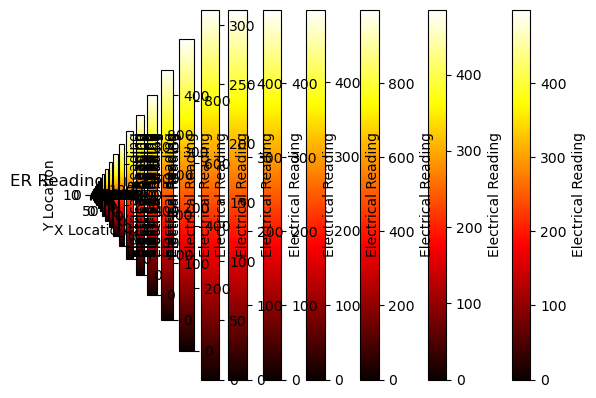

In [41]:
import os
import xml.etree.ElementTree as ET
import numpy as np
import matplotlib.pyplot as plt
import csv

# Parse the XML file and extract ER-Readings
def parse_er_readings_from_xml(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    
    x_locations = []
    y_locations = []
    electrical_readings = []
    
 
    
    # Extract ER-Readings
    list_iter=["ER-Readings","NDE001Readings","NDE001-Readings"]
    for i in list_iter:
        for er_reading in root.findall(".//"+i):
        # Your processing logic here
            y_location = float(er_reading.find('YLocation').text)
            x_location = float(er_reading.find('XLocation').text)
            electrical_reading = float(er_reading.find('ElectricalReading').text)
            
            y_locations.append(y_location)
            x_locations.append(x_location)
            electrical_readings.append(electrical_reading)
        
    return x_locations, y_locations, electrical_readings

# Create CSV files for ER-Readings and other tags
def create_csv_files(xml_file, output_dir):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    other_tags = []
    
    # Create CSV for ER-Readings
    er_csv_file_path = os.path.join(output_dir, f"{os.path.splitext(os.path.basename(xml_file))[0]}_ER-Readings.csv")
    with open(er_csv_file_path, mode='w', newline='', encoding='utf-8') as er_csv_file:
        writer = csv.writer(er_csv_file)
        writer.writerow(['XLocation', 'YLocation', 'ElectricalReading'])
        
        x_locations, y_locations, electrical_readings = parse_er_readings_from_xml(xml_file)
        for x, y, er in zip(x_locations, y_locations, electrical_readings):
            writer.writerow([x, y, er])
    
    # Create CSV for other tags
    for child in root:
        if child.tag != 'ER-Readings':
            for element in child:
                other_tags.append([child.tag, element.tag, element.text])
                other_csv_file_path = os.path.join(output_dir_files, f"{os.path.splitext(os.path.basename(xml_file))[0]}.csv")
                with open(other_csv_file_path, mode='w', newline='', encoding='utf-8') as other_csv_file:
                    writer = csv.writer(other_csv_file)
                    writer.writerow(['ParentTag', 'Tag', 'Value'])
                    writer.writerows(other_tags)

def create_image_from_csv(x, y, er, output_image):

    # Create a blank canvas
    img_size_x = int(x.max() + 1)
    img_size_y = int(y.max() + 1)
    image = np.zeros((img_size_y, img_size_x))

    # Fill the canvas with the ElectricalReading values
    for i in range(len(x)):
        image[int(y[i]), int(x[i])] = er[i]

    # Plot the image
    plt.imshow(image, cmap='hot', interpolation='nearest')
    plt.colorbar(label='Electrical Reading')
    plt.title('ER Readings Image')
    plt.xlabel('X Location')
    plt.ylabel('Y Location')
    plt.savefig(output_image)
    #plt.show()

input_dir = '/Users/madipellirishitha/Downloads/data/Input/Electrical Resistivity'
output_dir_files = '/Users/madipellirishitha/Downloads/data/Output/ER/Files'
output_dir_images = '/Users/madipellirishitha/Downloads/data/Output/ER/Images'

# Create output directories if they don't exist
os.makedirs(output_dir_files, exist_ok=True)
os.makedirs(output_dir_images, exist_ok=True)

# Iterate over each directory and process XML files
for filename in os.listdir(input_dir):
    if filename.lower().endswith('.xml'):
        xml_file_path = os.path.join(input_dir, filename)
        output_image_path = os.path.join(output_dir_images, f"{os.path.splitext(filename)[0]}.png")
        
        x_locations, y_locations, electrical_readings = parse_er_readings_from_xml(xml_file_path)
        create_image(x_locations, y_locations, electrical_readings, output_image_path)
            
            # Create CSV files for ER-Readings and other tags
        create_csv_files(xml_file_path, output_dir_files)

print("Processing complete.")

In [ ]:
#preprocessing